# Análisis dataset

Análisis del dataset dado

In [ ]:
# external imports
import os

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# constants
data_folder="../../data"
raw_data_folder = f"{data_folder}/raw"

original_train_dataset = f"{raw_data_folder}/train.csv"

In [3]:
# upload the dataset
original_train_df = pd.read_csv(original_train_dataset, sep=",")
original_train_df.head()

,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,bd9d6267ec5,1523195006,"P-SCAPE LAND DESIGN, LLC",NORTHFIELD,OH,CITIZENS BANK NATL ASSOC,RI,1-Nov-05,2006,2,...,0,2,0,1,N,N,31-Dec-05,"$8,000.00",$0.00,1
1,9eebf6d8098,1326365010,The Fresh & Healthy Catering C,CANTON,OH,"FIRSTMERIT BANK, N.A.",OH,6-Jun-05,2005,2,...,1,2,1,1,N,N,31-Jul-05,"$166,000.00",$0.00,1
2,83806858500,6179584001,AARON MASON & HOWE LLC,SAWYERWOOD,OH,"PNC BANK, NATIONAL ASSOCIATION",OH,18-Mar-03,2003,2,...,4,2,1,2,Y,N,31-Mar-03,"$25,000.00",$0.00,1
3,a21ab9cb3af,8463493009,MID OHIO CAR WASH,COLUMBUS,OH,THE HUNTINGTON NATIONAL BANK,OH,28-Jun-95,1995,2,...,0,0,1,0,N,N,31-Jan-96,"$220,100.00",$0.00,1
4,883b5e5385e,3382225007,Bake N Brew LLC,Newark,OH,THE HUNTINGTON NATIONAL BANK,OH,16-Apr-09,2009,0,...,0,0,0,1,N,N,31-May-09,"$25,000.00",$0.00,0


Ahora que tenemos el dataset listo para verlo vamos a comprobar distintos aspectos de cada una de las columnas y que valores contienen.

In [4]:
original_train_df.columns.to_list()

['id',
 'LoanNr_ChkDgt',
 'Name',
 'City',
 'State',
 'Bank',
 'BankState',
 'ApprovalDate',
 'ApprovalFY',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'Accept']

- id: (Text) - Identifier of the data instance
- LoanNr_ChkDgt: (Text) - Identifier of the loan petition
- Name: (Text) - Borrower name
- City: (Text) - Borrower city
- State: (Text) - Borrower state
- Bank: (Text) - Bank name
- BankState: (Text) - Bank state
- ApprovalDate: (Date/Time) - Date SBA commitment issued
- ApprovalFY: (Text) - Fiscal year of commitment
- NoEmp: (Numb) - Number of business employees
- NewExist: (Text) - 1 = Existing business, 2 = New business
- CreateJob: (Number) - Number of jobs created
- RetainedJob: (Number) - Number of jobs retained
- FranchiseCode: (Text) - Franchise code, (00000 or 00001) = No franchise
- UrbanRural: (Text) - 1 = Urban, 2 = rural, 0 = undefined
- RevLineCr: (Text) - Revolving line of credit: Y = Yes, N = No
- LowDoc: (Text) - LowDoc Loan Program: Y = Yes, N = No
- ChgOffDate: (Date/Time) - The date when a loan is declared to be in default
- DisbursementDate: (Date/Time) - Disbursement date
- DisbursementGross: (Currency) - Amount disbursed
- BalanceGross: (Currency) - Gross amount outstanding
- Accept: (Text) - Loan approval status. 0 = not approved, 1 = approved

In [5]:
processed_train_df = original_train_df.copy()

Las siguientes columnas no las consideramos últies para el entrenamiento de ningún modelo. Ya sea porque son identificadores únicos que no aportan información significativa o porque son valores excesivamente amplios y heterogeneos como para ser utilizados como puede ser el nombre de la compañía.

- id
- LoanNr_ChkDgt
- Name


In [6]:
processed_train_df.drop(columns=["id", "LoanNr_ChkDgt", "Name"], inplace=True)

## Análisis columnas en detalle

La siguiente fase consistirá en revisar los valores del resto de columnas para decidir si aportan información adecuada o no.

In [7]:
# Análisis columna
column="City"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())


Valores nulos 1
City
COLUMBUS          1754
CINCINNATI        1383
CLEVELAND         1015
TOLEDO             702
DAYTON             660
                  ... 
CHARGRIN FALLS       1
PORT JEFFERSON       1
Norwich              1
Bainbridge           1
EVANSTON             1
Name: count, Length: 1678, dtype: int64


El valor nulo de la columna `City` o se rellena con la moda o se elimina directamente para evitar ruido.

In [8]:
# Análisis columna
column="State"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 0
State
OH    22835
Name: count, dtype: int64


La columna `State`no aporta información porque todas las filas tienen el mismo valor

In [9]:
# Análisis columna
column="Bank"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 22
Bank
THE HUNTINGTON NATIONAL BANK      4263
PNC BANK, NATIONAL ASSOCIATION    2901
JPMORGAN CHASE BANK NATL ASSOC    2707
CITIZENS BANK NATL ASSOC          1734
U.S. BANK NATIONAL ASSOCIATION    1416
                                  ... 
EAST WEST BANK                       1
THE PEOPLES NATIONAL BANK            1
THE HENRY COUNTY BANK                1
BUCKEYE STATE CU INC                 1
CITIZENS BANK OF PENNSYLVANIA        1
Name: count, Length: 286, dtype: int64


Los valores nulos de la columna `Bank` o se rellena con la moda o se elimina directamente para evitar ruido.

Valores nulos 22
BankState
OH    14875
IL     2660
RI     1739
DE     1328
VA      502
CA      358
IN      246
SD      228
PA      126
TX      106
WV       68
SC       65
OR       64
KY       57
FL       55
CT       52
MI       46
NY       46
NC       44
MN       37
KS       29
TN       20
UT       11
NV       10
DC        7
MO        6
WA        6
CO        4
NJ        3
OK        2
GA        2
ID        2
ME        1
AZ        1
IA        1
MD        1
NE        1
AL        1
WI        1
WY        1
NM        1
Name: count, dtype: int64


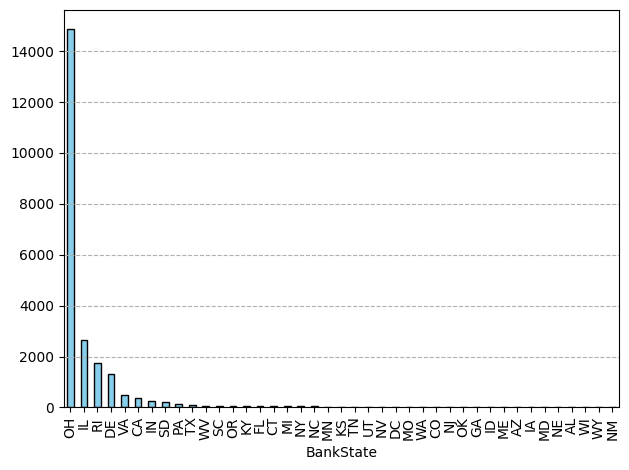

In [10]:
# Análisis columna
column="BankState"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Los valores nulos de la columna `BankState` o se rellena con la moda o se elimina directamente para evitar ruido.

In [11]:
# Análisis columna
column="ApprovalDate"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 0
ApprovalDate
18-Apr-05    35
12-Oct-04    30
12-Apr-05    28
30-Jun-05    25
18-Mar-05    25
             ..
13-Feb-90     1
18-Jun-91     1
20-Nov-09     1
12-Dec-88     1
28-Jul-88     1
Name: count, Length: 5862, dtype: int64


La columna de `ApprovalDate` no tiene nulos. Al ser una fecha debe modificarse de forma que el mes y año esten de forma númerica en columnas distintas.

Valores nulos 0
ApprovalFY
2005    2653
2006    2246
2007    2024
2004    1342
2008    1176
2003    1099
1995    1039
1997     971
1996     946
1999     928
1998     927
2002     909
2000     902
2001     793
2009     623
1994     582
2010     486
2011     459
1993     441
1990     380
1992     356
1989     306
1991     302
2012     171
1986     121
1984     109
1983      97
2013      93
1987      87
1985      86
1988      69
1982      48
2014      18
1981      14
1979      11
1980       9
1978       3
1977       2
1976       2
1972       2
1974       1
1970       1
1971       1
Name: count, dtype: int64


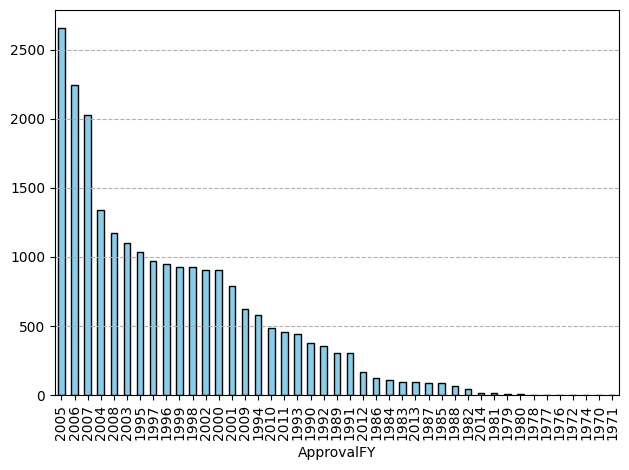

In [12]:
# Análisis columna
column="ApprovalFY"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna de `ApprovalFY` no tiene nulos. Como es directamente el año fiscal de aprobación puede servir directamente para usarlo.

Valores nulos 0
NoEmp
1       3583
2       3057
3       1967
4       1651
5       1422
        ... 
1150       1
500        1
290        1
202        1
117        1
Name: count, Length: 191, dtype: int64


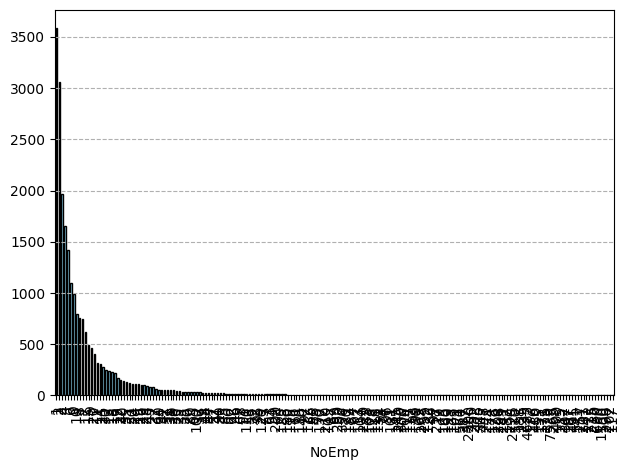

In [13]:
# Análisis columna
column="NoEmp"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna de `NoEmp` no tiene nulos. Sería apropiado dividirlo por rangos en vez de los valores unitarios.

In [14]:
# Análisis columna
column="NewExist"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())


Valores nulos 2
NewExist
1.0    15988
2.0     6833
0.0       12
Name: count, dtype: int64


La columna `NewExist` contine valores nulos y valores 0 que son incogruentes con el significado dado en la definición. Se pueden sustituir por los estádisticos como la moda o eliminar esos valores. Además los valores deberián ser números enteros y no reales.

Valores nulos 0
CreateJob
0      15676
1       1407
2       1385
3        755
4        581
       ...  
48         1
198        1
68         1
145        1
252        1
Name: count, Length: 88, dtype: int64


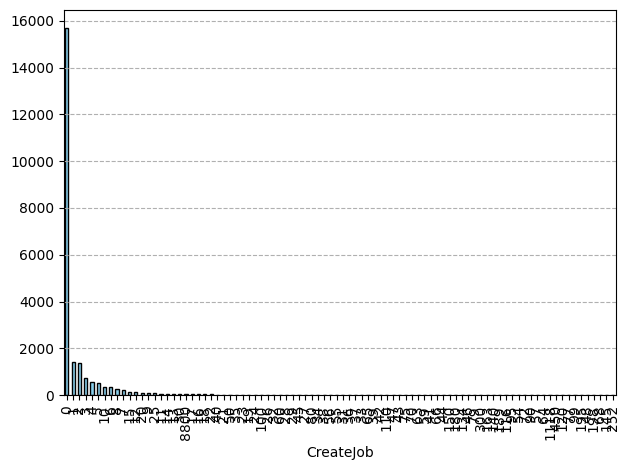

In [15]:
# Análisis columna
column="CreateJob"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna `CreateJob` no contine valores nulos. Los valores deberían asignarse en rangos o dividirse de forma binaria entre 0 si no hay puestos de trabajo creados o 1 si los hay.

Valores nulos 0
RetainedJob
0      11681
1       1965
2       1760
3       1139
4        896
       ...  
275        1
59         1
98         1
202        1
117        1
Name: count, Length: 127, dtype: int64


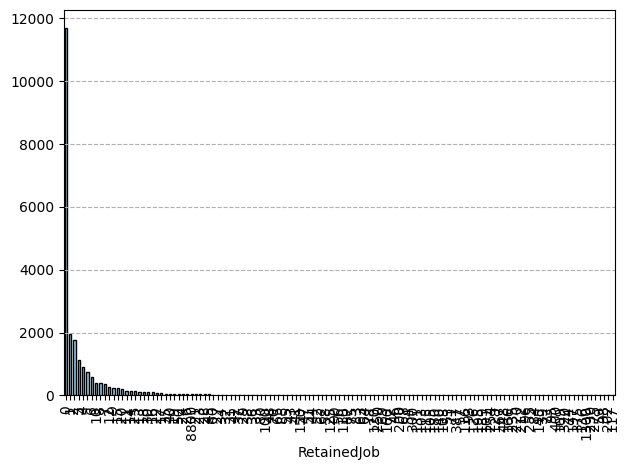

In [16]:
# Análisis columna
column="RetainedJob"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna `RetainedJob` no contine valores nulos. Los valores deberían asignarse en rangos o dividirse de forma binaria entre 0 si no hay puestos de trabajo creados o 1 si los hay.

In [17]:
# Análisis columna
column="FranchiseCode"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 0
FranchiseCode
1        13816
0         7451
78760      101
21780       45
68020       43
         ...  
76750        1
17050        1
47756        1
43810        1
34550        1
Name: count, Length: 475, dtype: int64


La columna `FranchiseCode` no contine valores nulos. Sin embargo tiene valores dispares que deberían modificarse para unificarlos como 0 si no hay franquicia y 1 si hay franquicia.

Valores nulos 0
UrbanRural
1    11582
0     7538
2     3715
Name: count, dtype: int64


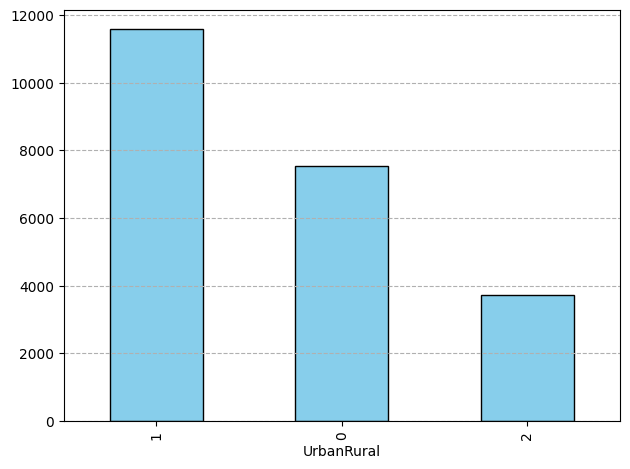

In [18]:
# Análisis columna
column="UrbanRural"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna `UrbanRural` no contiene valores nulos y todos los valores tienen sentido.

Valores nulos 91
RevLineCr
N    11125
Y     6127
0     5228
T      263
`        1
Name: count, dtype: int64


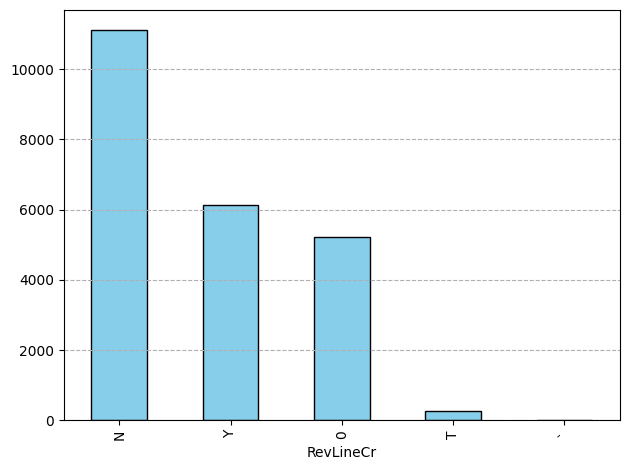

In [19]:
# Análisis columna
column="RevLineCr"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

# Histograma de la columna
processed_train_df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

La columna `RevLineCr` contiene valores nulos y además valores incongruentes con la definición aportada. Probablemente la T signifique True y el 0 signifique False.

In [20]:
# Análisis columna
column="LowDoc"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 43
LowDoc
N    19661
Y     3094
0       20
A        8
S        5
R        2
C        2
Name: count, dtype: int64


La columna `LowDoc` contiene valores nulos y además valores incongruentes con la definición aportada. Los valores incongruentes consultando distintas fuentes llegamos a la conclusión que provienen de distintas nomenclaturas de programas de prestamos y se deben codificar como:

- '0': 'No'
- 'A': 'No'
- 'R': 'No'
- 'S': 'No'
- 'C': 'No'

In [21]:
# Análisis columna
# column="ChgOffDate"
# print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
# print(processed_train_df[column].value_counts())

La columna `ChgOffDate` no existe en los datos proporcionados

In [22]:
# Análisis columna
column="DisbursementDate"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 61
DisbursementDate
28-Feb-06    367
31-Jul-95    272
30-Apr-05    247
31-May-06    241
31-Aug-05    234
            ... 
27-Oct-78      1
15-Feb-85      1
23-Sep-11      1
17-Feb-10      1
6-May-71       1
Name: count, Length: 1259, dtype: int64


La columna `DisbursementDate` contiene valores nulos. Como es una fecha debería formatearse para dividirlo en columnas distintas con el año y mes de forma diferente. Al ser algo posterior en ejecución a la aprobación del prestamo no parece relevante.

In [23]:
# Análisis columna
column="DisbursementGross"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 0
DisbursementGross
$50,000.00      922
$100,000.00     872
$25,000.00      837
$150,000.00     486
$35,000.00      356
               ... 
$68,270.00        1
$134,100.00       1
$8,561.00         1
$45,489.00        1
$77,520.00        1
Name: count, Length: 7380, dtype: int64


La columna `DisbursementGross` no contiene valores nulos aunque al ser una moneda se debería eliminar los simbolos extraños de forma que solo queden los números enteros. Además para favorer la clasificación se pueden asignar tramos en vez de los valores reales para evitar valores atípicos.

In [24]:
# Análisis columna
column="BalanceGross"
print(f"Valores nulos {processed_train_df[column].isnull().sum()}")
print(processed_train_df[column].value_counts())

Valores nulos 0
BalanceGross
$0.00           22833
$9,111.00           1
$996,262.00         1
Name: count, dtype: int64


La columna `BalanceGross` es una columna que no aporta información por los valores que aparecen. 